# Imports

In [1]:
using LinearAlgebra
using Printf
using Plots

global const µ = 3.986e14  # m^3/s^2

include("eval_f.jl")
include("forward_euler.jl")
include("trapezoidal.jl")
include("generate_random_initial_state.jl")

function f(x)
    feval(x,0,0)
end

f (generic function with 1 method)

# Generate an example initial state to test

In [3]:
radius = 7e6  # m
velocity = sqrt(µ/radius)

x0 = [radius, 0, 0, 0, velocity, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
# num_steps = 1000
# xs = euler(f, t0, ti, x0, num_steps)

5828.519867788796

# Iterative over step size to produce a reference solution

In [41]:
count = 500
energy_ratio = zeros(count)
steps = zeros(count)
diff = zeros(count)
for i in 1:count
    x0 = [radius, 0, 0, 0, velocity, 0]
    t0 = 0
    ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
    steps[i] = 50*i
    xs_i = euler(f, t0, ti, x0, steps[i])
    if i>1
#         println(steps[i],", ",steps[i-1])
#         println(length(xs_i),", ", length(xs))
#         println(length(xs_i[1:i:end]),", ", length(xs[1:i-1:end-1*i]))
        lenx = floor(Int, length(xs_i[1:i:end]))
        diff[i] = norm(xs_i[1:i:end] - xs[1:i-1:(i-1)*lenx])
    end
    xs = xs_i
    energy_ratio[i] = abs(energy(x0)/energy(xs[floor(Int,steps[i]+1),:]))
end

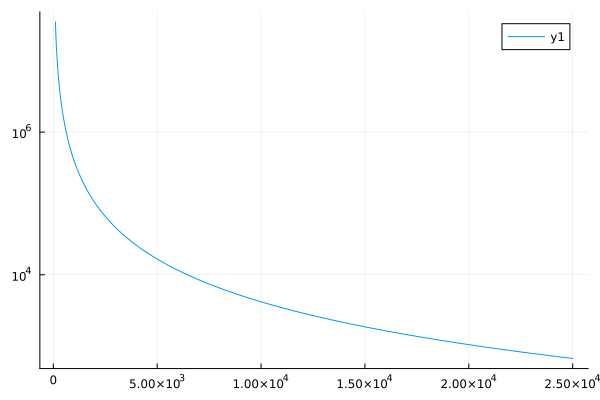

In [48]:
plot([50*i for i in [2:1:count]], diff[2:1:end],yaxis=:log)

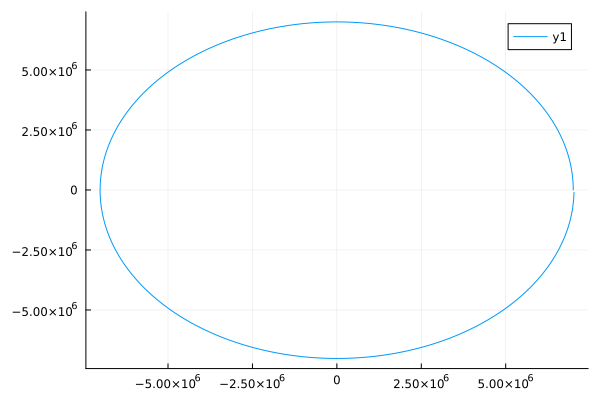

In [30]:
plot(xs[:,1],xs[:,2])

# Compare to trapezoidal method

In [32]:
radius = 7e6  # m
velocity = sqrt(µ/radius)


x0 = [radius, 0, 0, 0, velocity, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
num_steps = 1000
xs = trapezoidal(f, t0, ti, x0, num_steps);

In [42]:
count_ = 10
energy_ratio_ = zeros(count)
steps_ = zeros(count)
diff_ = zeros(count)
for i in 1:count_
    x0 = [radius, 0, 0, 0, velocity, 0]
    t0 = 0
    ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
    steps_[i] = 50*i
    xs_i = trapezoidal(f, t0, ti, x0, steps[i])
    if i>1
#         println(steps[i],", ",steps[i-1])
#         println(length(xs_i),", ", length(xs))
#         println(length(xs_i[1:i:end]),", ", length(xs[1:i-1:end-1*i]))
        lenx = floor(Int, length(xs_i[1:i:end]))
        diff_[i] = norm(xs_i[1:i:end] - xs[1:i-1:(i-1)*lenx])
    end
    xs = xs_i
    energy_ratio_[i] = abs(energy(x0)/energy(xs[floor(Int,steps[i]+1),:]))
end

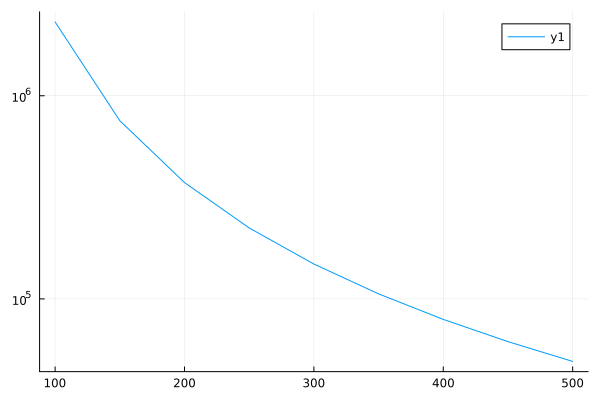

In [47]:
plot([50*i for i in 2:1:10], diff_[2:1:10],yaxis=:log)

# Compare euler to trap

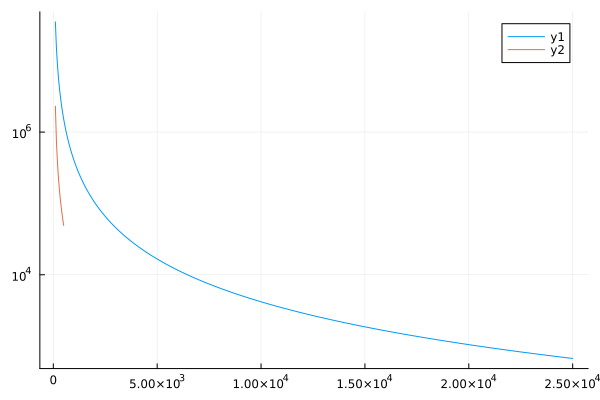

In [50]:
plot([[50*i for i in [2:1:count]],[50*i for i in 2:1:10]], [diff[2:1:end],diff_[2:1:10]],yaxis=:log)


In [53]:
using BenchmarkTools

In [58]:

x0 = [radius, 0, 0, 0, velocity, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
@btime xs_i = trapezoidal(f, t0, ti, x0, 500)



  871.594 ms (6044620 allocations: 422.57 MiB)


501×6 Matrix{Float64}:
 7.0e6           0.0        0.0      0.0       7546.05  0.0
 6.99945e6   87961.1        0.0    -94.8227    7545.45  0.0
 6.99779e6       1.75908e5  0.0   -189.63      7543.67  0.0
 6.99503e6       2.63828e5  0.0   -284.408     7540.69  0.0
 6.99116e6       3.51706e5  0.0   -379.141     7536.52  0.0
 6.98619e6       4.39528e5  0.0   -473.814     7531.16  0.0
 6.98011e6       5.27281e5  0.0   -568.412     7524.61  0.0
 6.97294e6       6.1495e5   0.0   -662.921     7516.87  0.0
 6.96466e6       7.02523e5  0.0   -757.324     7507.95  0.0
 6.95528e6       7.89984e5  0.0   -851.609     7497.84  0.0
 6.9448e6        8.77321e5  0.0   -945.758     7486.55  0.0
 6.93323e6       9.64519e5  0.0  -1039.76      7474.07  0.0
 6.92056e6       1.05157e6  0.0  -1133.59      7460.42  0.0
 ⋮                                                      ⋮
 6.93315e6      -9.65093e5  0.0   1040.38      7473.99  0.0
 6.94473e6      -8.77895e5  0.0    946.377     7486.47  0.0
 6.95522e6      -7.

In [61]:
x0 = [radius, 0, 0, 0, velocity, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
@btime xs_i = euler(f, t0, ti, x0, 2500)



  6.134 ms (52504 allocations: 3.91 MiB)


2501×6 Matrix{Float64}:
 7.0e6          0.0        0.0     0.0     7546.05  0.0
 7.0e6      17592.9        0.0   -18.9653  7546.05  0.0
 6.99996e6  35185.8        0.0   -37.9304  7546.0   0.0
 6.99987e6  52778.6        0.0   -56.8952  7545.91  0.0
 6.99973e6  70371.2        0.0   -75.8596  7545.76  0.0
 6.99956e6  87963.5        0.0   -94.8235  7545.57  0.0
 6.99934e6      1.05555e5  0.0  -113.787   7545.33  0.0
 6.99907e6      1.23147e5  0.0  -132.749   7545.05  0.0
 6.99876e6      1.40737e5  0.0  -151.711   7544.71  0.0
 6.99841e6      1.58327e5  0.0  -170.671   7544.33  0.0
 6.99801e6      1.75916e5  0.0  -189.63    7543.9   0.0
 6.99757e6      1.93504e5  0.0  -208.589   7543.43  0.0
 6.99708e6      2.11091e5  0.0  -227.545   7542.9   0.0
 ⋮                                                  ⋮
 7.11461e6     -1.21833e6  0.0  1252.38    7322.4   0.0
 7.11753e6     -1.20126e6  0.0  1234.8     7325.41  0.0
 7.12041e6     -1.18418e6  0.0  1217.21    7328.38  0.0
 7.12324e6     -1.1671e6  

# Try dynamic time stepping

In [4]:

x0 = [radius, 0, 0, 0, velocity, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
xs_i,t = trapezoidal_dynamic(f, t0, ti, x0, 500)



87962.90911119504
96758.79895113093
106434.14502783377
106434.14502783371
106434.14502783369
106434.14502783366
106434.1450278337
106434.14502783369
106434.14502783376
106434.14502783373
106434.1450278337
106434.14502783374
106434.14502783373
106434.14502783377
106434.14502783363
106434.14502783376
106434.14502783371
106434.14502783387
106434.14502783376
106434.14502783383
106434.14502783364
106434.14502783364
106434.14502783389
106434.14502783366
106434.14502783369
106434.14502783353
106434.14502783373
106434.14502783377
106434.14502783358
106434.14502783371
106434.14502783373
106434.1450278339
106434.14502783396
106434.14502783374
106434.14502783386
106434.14502783385
106434.14502783358
106434.14502783334
106434.14502783403
106434.14502783377
106434.14502783348
106434.14502783369
106434.1450278335
106434.14502783341
106434.14502783353
106434.14502783385
106434.14502783377
106434.1450278341
106434.14502783422
106434.14502783366
106434.14502783354
106434.1450278338
106434.14502783342
1

([7.0e6 0.0 … 7546.049108166282 0.0; 6.999447323972314e6 87961.12173461741 … 7545.453319531164 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [11.657039735577591, 24.479783444712943, 38.58480152476183, 52.689819604810715, 66.7948376848596, 80.8998557649085, 95.00487384495739, 109.10989192500628, 123.21491000505517, 137.31992808510407  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

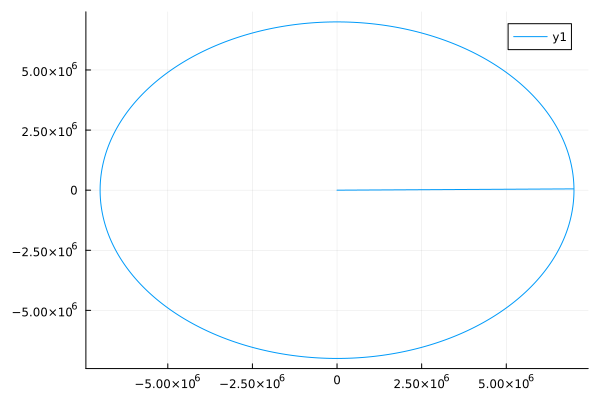

In [5]:
plot(xs_i[:,1],xs_i[:,2])

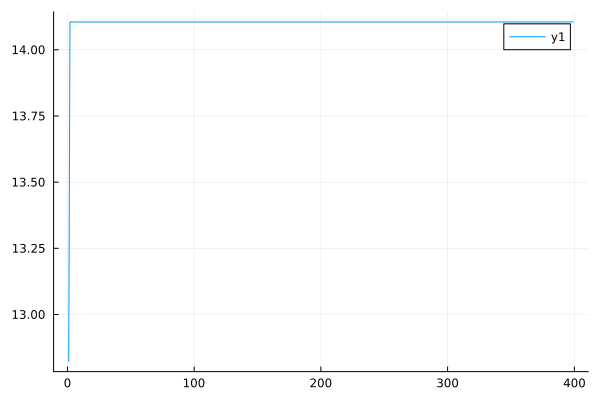

In [9]:
plot(t[2:1:400] - t[1:1:400-1])

In [11]:

x0 = [radius, 0, 0, 0, velocity*0.8, 0]
t0 = 0
ti = 2*pi*radius^1.5/µ^0.5  # Should result in 1 orbit
xs_i,t = trapezoidal_dynamic(f, t0, ti, x0, 500)



70371.13154836213
77415.32385265217
85175.01494289997
93727.25905179267
103159.02688158896
103240.86816786366
103342.36636582333
103463.54076807866
103604.41455672676
103765.01488625711
103945.3729794658
104145.52423618347
104365.50835460133
104605.3694649511
104865.1562752695
105144.92222895315
105444.7256737842
105764.63004207892
106104.70404158255
106465.02185670755
106845.66335967995
107246.71433112277
107668.26668956986
108110.41872936586
108573.27536634945
109056.94839068086
109561.55672610473
110087.22669486782
110634.09228743876
111202.29543608398
111791.98629124748
112403.32349955592
113036.47448213112
113691.61571173952
114368.9329870936
115068.62170242936
115790.88711021455
116535.9445745568
117304.01981254146
118095.3491203655
118910.17958065387
119748.76924687116
120611.3873001533
121498.3141732018
122409.84163513842
123346.2728303389
124307.92226327829
125295.11572026752
126308.19011768249
127347.49326480231
128413.3835276945
129506.22937867852
130626.40881371764
131774.3

([7.0e6 0.0 … 6036.839286533026 0.0; 6.999447300407292e6 70368.89715078314 … 6036.362614978114 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [11.657039735577591, 24.479783444712943, 38.58480152476183, 54.1003214128156, 71.16739328967476, 88.23446516653392, 105.30153704339308, 122.36860892025224, 139.4356807971114, 156.50275267397055  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

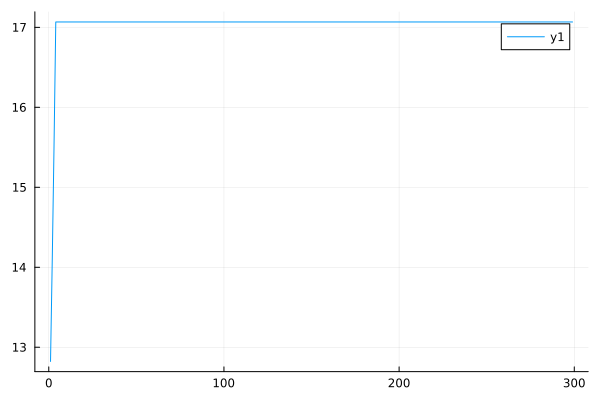

In [13]:
plot(t[2:1:300] - t[1:1:300-1])

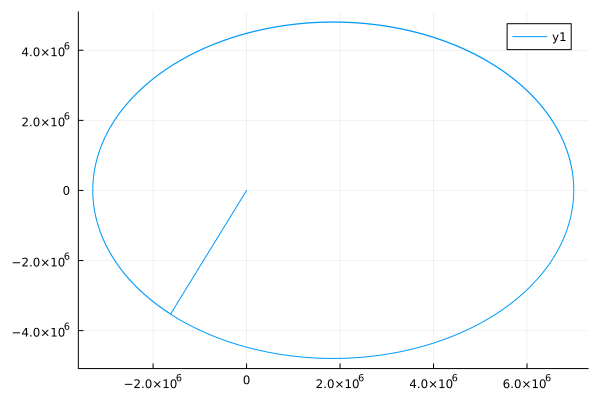

In [14]:
plot(xs_i[:,1],xs_i[:,2])